### Assessing Cluster Correctness
We talked a little bit about assessing clusters when the ground truth is not known. However, we have not yet talked about assessing KMeans when the cluster is known. In a lot of cases, this isn't knowable; however, if there is outside annotation, we will know the ground truth, or at least the proxy, sometimes.

### Getting Some Data
So, let's suppose that we have some outside agent supplying us with the ground truth. We'll create a simple dataset, evaluate the measures of correctness against the ground truth in several ways, and then discuss them:

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster
blobs, ground_truth = datasets.make_blobs(1000,centers=3, cluster_std=1.75)


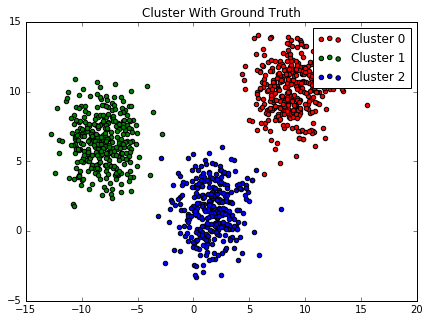

In [12]:
# Before we walk through the metrics, let's take a look at the dataset:
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']

for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],label="Cluster {}".format(i))
    ax.set_title("Cluster With Ground Truth")
    ax.legend()
    

The following is the output:
In order to fit a KMeans model we'll create a KMeans object from
the cluster module:

In [13]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_


array([[  8.68209726,  10.08421885],
       [ -8.11930565,   6.41255463],
       [  1.64708745,   1.52285038]])

Now that we've fit the model, let's have a look at the cluster centroids:


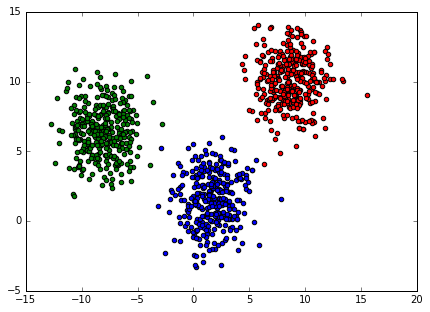

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
    label="Cluster {}".format(i))

In [16]:
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,color='black',label='Centers')
ax.set_title("Cluster With Ground Truth")
ax.legend()
f.savefig("9485OS_03-17")

The following is the output: GRAPH Now that we can view the
clustering performance as a classification exercise, the metrics that
are useful in its context are also useful here:

In [17]:
for i in range(3):
    print ((kmeans.labels_ == ground_truth)[ground_truth == i].astype(int).mean())


0.997005988024
1.0
0.996996996997


Clearly, we have some backward clusters. So, let's get this straight-
ened out first, and then we'll look at the accuracy:

In [18]:
new_ground_truth = ground_truth.copy()
new_ground_truth[ground_truth == 0] = 2
new_ground_truth[ground_truth == 2] = 0
for i in range(3):
    print ((kmeans.labels_ == new_ground_truth)[ground_truth == i] .astype(int).mean())


0.00299401197605
1.0
0.0


So, we're roughly correct 90 percent of the time. The second
measure of similarity we'll look at is the mutual information score:

In [19]:
from sklearn import metrics
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)


0.98760591474867709

* As the score tends to be 0, the label assignments are probably not generated through similar processes; however, the score being closer
to 1 means that there is a large amount of agreement between the two labels.
* For example, let's look at what happens when the mutual
information score itself:


In [20]:
metrics.normalized_mutual_info_score(ground_truth,ground_truth)

1.0

Given the name, we can tell that there is probably an unnormalized mutual info score:

In [21]:
metrics.mutual_info_score(ground_truth, kmeans.labels_)



1.0849950070269998

These are very close; however, normalized mutual information is
the mutual information divided by the root of the product of the
entropy of each set truth and assigned label.

### Further Remarks

* One cluster metric we haven't talked about yet and one that is
not reliant on the ground truth is inertia.
* It is not very well documented as a metric at the moment.
* However, it is the metric that KMeans minimizes.


#### Inertia
Inertia is the sum of the squared dierence between each point and
its assigned cluster. We can use a little NumPy to determine this:

In [22]:
kmeans.inertia_

5945.5034434289018

### Inertia 

for scikit learn, inertia is calculated as the sum of squared distance
for each point to it's closest centroid, i.e., its assigned cluster. So
$$I =P
i(d(i; cr))$$ where $c_r$ is the centroid of the assigned cluster and
$d$ is the squared distance.